## TESTING EFFICIENTNETS WITH FASTAI

Pytorch pretrained EffcientNet models from: https://github.com/lukemelas/EfficientNet-PyTorch
        
Data from https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder

In [1]:
from fastai.vision import *

import pandas as pd

import torch
from torch.optim import Optimizer

from efficientnet_pytorch import EfficientNet

In [2]:
PROJECT_ROOT = Path('.').absolute().parents[0]
DATA_FOLDER = PROJECT_ROOT / 'data' / 'processed'
TRAIN_CSV = DATA_FOLDER / 'train.csv'
VALID_CSV = DATA_FOLDER / 'valid.csv'
CARS_FOLDER = DATA_FOLDER / 'car_data'

In [3]:
model_name = 'efficientnet-b3'
image_size = EfficientNet.get_image_size(model_name)

In [4]:
image_size

300

In [5]:
model = EfficientNet.from_pretrained(model_name)

Loaded pretrained weights for efficientnet-b3


In [6]:
model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

In [7]:
train = pd.read_csv(TRAIN_CSV, header=None)
test = pd.read_csv(VALID_CSV, header=None)

In [8]:
train.columns = ['file','x1','y1','x2','y2','class']

In [9]:
train.head()

file   x1   y1    x2    y2  class
0  00001.jpg   39  116   569   375     14
1  00002.jpg   36  116   868   587      3
2  00003.jpg   85  109   601   381     91
3  00004.jpg  621  393  1484  1096    134
4  00005.jpg   14   36   133    99    106

In [10]:
bs = 1

In [11]:
np.random.seed(42)
src = (ImageList.from_folder(CARS_FOLDER/'train').split_by_rand_pct(0.1).label_from_folder())

In [12]:
src

LabelLists;

Train: LabelList (7330 items)
x: ImageList
Image (3, 335, 696),Image (3, 266, 400),Image (3, 194, 259),Image (3, 480, 640),Image (3, 458, 688)
y: CategoryList
Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 1188, 1600),Image (3, 1200, 1600),Image (3, 204, 300),Image (3, 938, 1500),Image (3, 126, 207)
y: CategoryList
Audi V8 Sedan 1994,BMW M5 Sedan 2010,Suzuki Aerio Sedan 2007,Nissan Leaf Hatchback 2012,Lamborghini Aventador Coupe 2012
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Test: None

In [13]:
src.classes[1]

'Acura Integra Type R 2001'

In [14]:
tfms=get_transforms()

In [15]:
data = (src.transform(tfms, size=448, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs).normalize(imagenet_stats))

In [16]:
data

ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Audi V8 Sedan 1994,BMW M5 Sedan 2010,Suzuki Aerio Sedan 2007,Nissan Leaf Hatchback 2012,Lamborghini Aventador Coupe 2012
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Test: None

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['AM General Hummer SUV 2000',
  'Acura Integra Type R 2001',
  'Acura RL Sedan 2012',
  'Acura TL Sedan 2012',
  'Acura TL Type-S 2008',
  'Acura TSX Sedan 2012',
  'Acura ZDX Hatchback 2012',
  'Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin V8 Vantage Coupe 2012',
  'Aston Martin Virage Convertible 2012',
  'Aston Martin Virage Coupe 2012',
  'Audi 100 Sedan 1994',
  'Audi 100 Wagon 1994',
  'Audi A5 Coupe 2012',
  'Audi R8 Coupe 2012',
  'Audi RS 4 Convertible 2008',
  'Audi S4 Sedan 2007',
  'Audi S4 Sedan 2012',
  'Audi S5 Convertible 2012',
  'Audi S5 Coupe 2012',
  'Audi S6 Sedan 2011',
  'Audi TT Hatchback 2011',
  'Audi TT RS Coupe 2012',
  'Audi TTS Coupe 2012',
  'Audi V8 Sedan 1994',
  'BMW 1 Series Convertible 2012',
  'BMW 1 Series Coupe 2012',
  'BMW 3 Series Sedan 2012',
  'BMW 3 Series Wagon 2012',
  'BMW 6 Series Convertible 2007',
  'BMW ActiveHybrid 5 Sedan 2012',
  'BMW M3 Coupe 2012',
  'BMW M5 Sedan 2010',
  'BMW M6 Convertible 2010',
  'BMW X3 SUV 

In [18]:
list(children(model))[-2:]

[BatchNorm2d(1536, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True),
 Linear(in_features=1536, out_features=1000, bias=True)]

In [19]:
model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

In [20]:
newmodel = model

In [21]:
newmodel

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

In [22]:
newmodel.add_module('_fc',nn.Linear(1536, 196))

In [23]:
newmodel

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

In [24]:
loss_func = nn.CrossEntropyLoss()

In [25]:
RMSprop = partial(torch.optim.RMSprop)

In [26]:
learn = Learner(data, newmodel, loss_func=loss_func, metrics=[accuracy], opt_func=RMSprop)

In [27]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Audi V8 Sedan 1994,BMW M5 Sedan 2010,Suzuki Aerio Sedan 2007,Nissan Leaf Hatchback 2012,Lamborghini Aventador Coupe 2012
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.01000000000

In [28]:
learn.model

EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False
        (static_padding): ZeroPad2d(padding=(1, 1, 1, 1), value=0.0)
      )
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        40, 10, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        10, 40, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        40, 24, kernel_siz

In [29]:
learn.split([[learn.model._conv_stem, learn.model._bn0, learn.model._blocks[:12]],
             [learn.model._blocks[12:],learn.model._conv_head], 
             [learn.model._bn1,learn.model._fc]])

Learner(data=ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Audi V8 Sedan 1994,BMW M5 Sedan 2010,Suzuki Aerio Sedan 2007,Nissan Leaf Hatchback 2012,Lamborghini Aventador Coupe 2012
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.01000000000

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-06
Min loss divided by 10: 6.31E-08


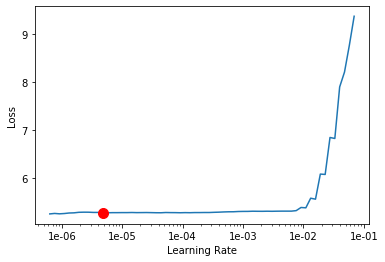

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [31]:
lr=1e-3

In [32]:
learn.fit_one_cycle(20, max_lr=slice(lr/100,lr))

In [33]:
learn.save('stage-1-cars-efficientnet-448-b3-git')

In [34]:
learn.load('stage-1-cars-efficientnet-448-b3-git')

Learner(data=ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007,Volvo XC90 SUV 2007
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Audi V8 Sedan 1994,BMW M5 Sedan 2010,Suzuki Aerio Sedan 2007,Nissan Leaf Hatchback 2012,Lamborghini Aventador Coupe 2012
Path: /home/matthew/Programming/Python/dl-efficientnet/data/processed/car_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d(padding=(0, 1, 0, 1), value=0.0)
  )
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.01000000000

## TEST

In [35]:
np.random.seed(42)
src_test = (ImageList.from_folder(path+'test').split_by_rand_pct(0.0).label_from_folder())

NameError: name 'path' is not defined

In [ ]:
src_test

In [ ]:
data_test = (src_test.transform([None, None], size=448, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs).normalize(imagenet_stats))

In [ ]:
learn.validate(data_test.train_dl)